In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import seaborn as sns
import scipy.stats
from matplotlib.lines import Line2D
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

loading data from /storage/holab/mito/donor1_chrM/cellsnp/cellSNP.cells.vcf.gz...
loading data from data/10_clonal_variants_fixedAF10pct/cellsnp/cellSNP.cells.vcf.gz...


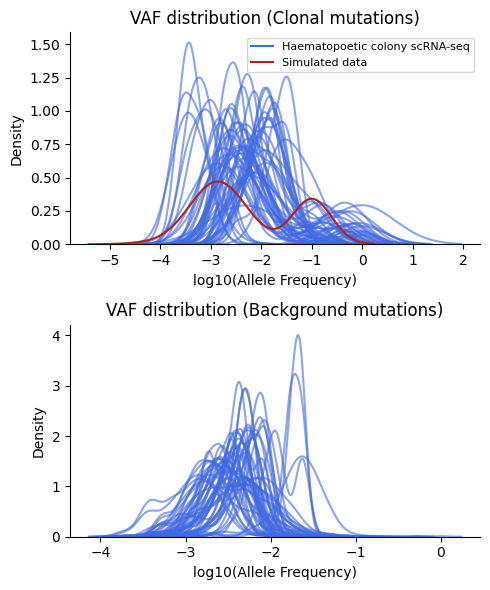

In [3]:
## Plot VAF distribution of clonal mutations and background mutations in sim vs real data
donor1 = load_donor1_informative()
AD_donor1, DP_donor1, AF_donor1 = load_vcf_data("/storage/holab/mito/donor1_chrM/cellsnp/cellSNP.cells.vcf.gz")
AD_simulated, DP_simulated, AF_simulated = load_vcf_data("data/10_clonal_variants_fixedAF10pct/cellsnp/cellSNP.cells.vcf.gz")

idx = donor1[donor1.mquad_name.isin(AF_donor1.index)].mquad_name

informative_AF = AF_donor1.loc[idx]

fig = plt.figure(figsize=(5, 6), dpi=100)
plt.subplot(2,1,1)
for i in idx:
    sns.kdeplot(np.log10(informative_AF.loc[i][informative_AF.loc[i] > 0]), color= (0.255, 0.412, 0.882, 0.6))

dist_clonal = np.log10(np.log(np.random.lognormal(mean = 0.1, sigma = 0.005, size=30)))
dist_background = np.log10(scipy.stats.beta.rvs(2,998,size=60))

dist = list(dist_clonal) + list(dist_background)
sns.kdeplot(dist, color="firebrick", label="Simulated")

plt.legend([Line2D([0], [0], color="royalblue", label="Donor1"), Line2D([0], [0], color="firebrick", label="Simulated")], ['Haematopoetic colony scRNA-seq', 'Simulated data'], loc='upper right', prop={'size': 8})
plt.title('VAF distribution (Clonal mutations)')
plt.xlabel('log10(Allele Frequency)')
plt.ylabel('Density')

plt.subplot(2,1,2)

low_vmr = pd.read_csv('/storage/holab/mito/donor1_low_vmr_variants.csv')
low_vmr[['ref', 'alt']] = low_vmr.nucleotide.str.split('>', expand=True)
low_vmr['mquad_name'] = 'chrM_' + low_vmr.position.astype(str) + '_' + low_vmr.ref + '_' + low_vmr.alt
idx2 = low_vmr[low_vmr.mquad_name.isin(AF_donor1.index)].mquad_name

noisy_AF = AF_donor1.loc[idx2]

for i in noisy_AF.index:
    sns.kdeplot(np.log10(noisy_AF.loc[i][noisy_AF.loc[i] > 0]), color= (0.255, 0.412, 0.882, 0.6))

plt.title('VAF distribution (Background mutations)')
plt.xlabel('log10(Allele Frequency)')
plt.ylabel('Density')

plt.tight_layout()
plt.savefig('figures/AF_dist.pdf')

In [6]:
np.mean(np.mean(noisy_AF))

0.004408987771437229

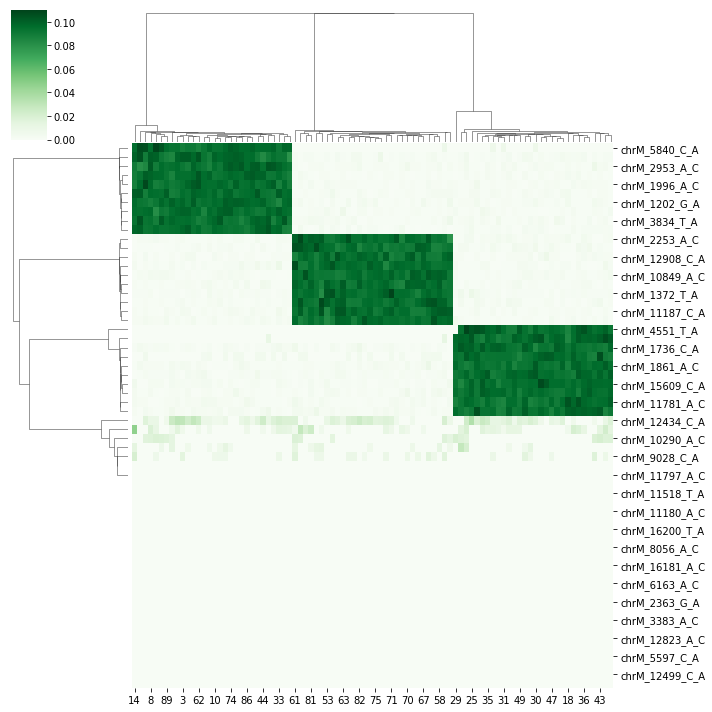

In [25]:
##visualize SNP AF with heatmap
clonal_var = pd.read_csv("data/10_clonal_variants_fixedAF10pct/clonal_var.csv")
plot_this = AF_simulated.loc[clonal_var['Unnamed: 0']].append(AF_simulated.sample(30))
sns.clustermap(plot_this, cmap="Greens")

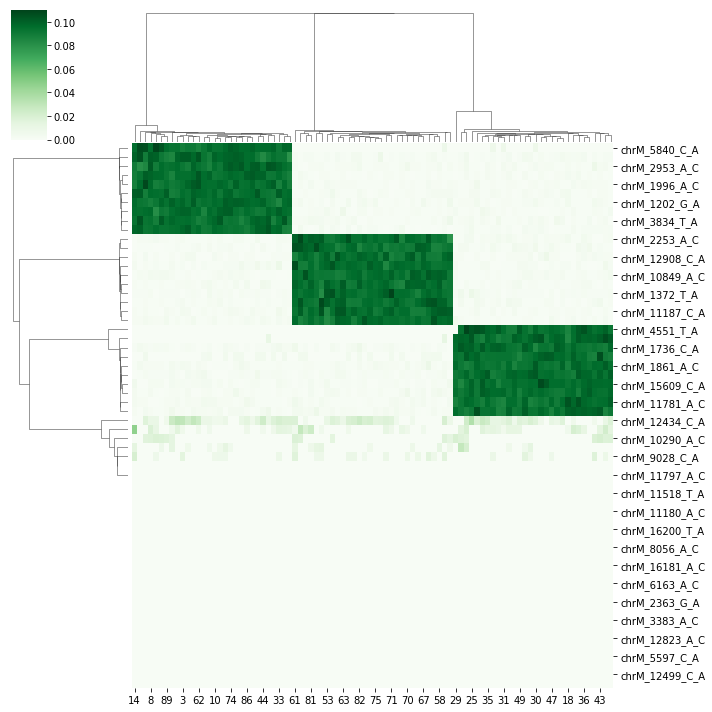

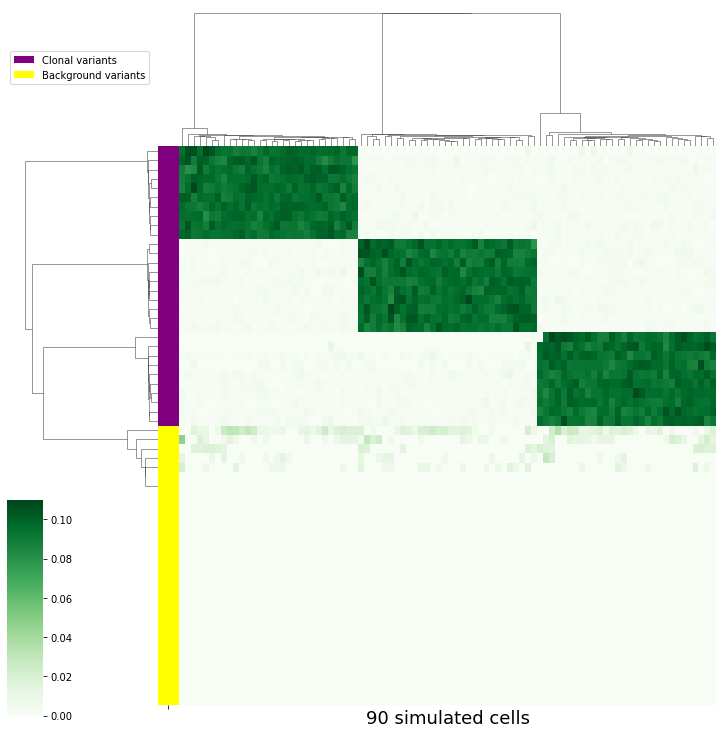

In [29]:
var_types = ['Clonal variants'] * 30 + ['Background variants'] * 30
var_pal = ['purple', 'yellow']
var_lut = dict(zip(set(var_types), var_pal))
row_colors = pd.Series(var_types).map(var_lut)
sns.clustermap(plot_this, cmap="Greens")

from matplotlib.pyplot import gcf
from matplotlib.patches import Patch
cm = 1/2.54

g = sns.clustermap(plot_this.reset_index(drop=True), cmap="Greens", xticklabels=False, yticklabels=False, row_colors=row_colors, cbar_pos=(0, 0, .05, .3))
g.ax_heatmap.set_xlabel("90 simulated cells", fontsize=18)
handles = [Patch(facecolor=var_lut[name]) for name in var_lut]
plt.legend(handles, var_lut, loc="center", ncol=1, bbox_to_anchor=(0.1,0.9), bbox_transform=gcf().transFigure, frameon=True)
plt.savefig('figures/AF_heatmap_clonalvar.pdf')

In [5]:
## Plot corresponding AF heatmaps to show how evolutionary models are varied in Fig. 1h
import matplotlib.gridspec

##visualize SNP AF with heatmap
AD_linear, DP_linear, AF_linear = load_vcf_data('data/10_clonal_variants_fixedAF10pct_linear/cellsnp/cellSNP.cells.vcf.gz')

informative_linear = pd.read_csv("data/10_clonal_variants_fixedAF10pct_linear/clonal_var.csv")

AD_branched, DP_branched, AF_branched = load_vcf_data('data/10_clonal_variants_fixedAF10pct/cellsnp/cellSNP.cells.vcf.gz')

informative_branched = pd.read_csv("data/10_clonal_variants_fixedAF10pct/clonal_var.csv")

AD_mixed, DP_mixed, AF_mixed = load_vcf_data('data/10_clonal_variants_fixedAF10pct_branched/cellsnp/cellSNP.cells.vcf.gz')

informative_mixed = pd.read_csv("data/10_clonal_variants_fixedAF10pct_branched/clonal_var.csv")


loading data from data/10_clonal_variants_fixedAF10pct_linear/cellsnp/cellSNP.cells.vcf.gz...
loading data from data/10_clonal_variants_fixedAF10pct/cellsnp/cellSNP.cells.vcf.gz...
loading data from data/10_clonal_variants_fixedAF10pct_branched/cellsnp/cellSNP.cells.vcf.gz...


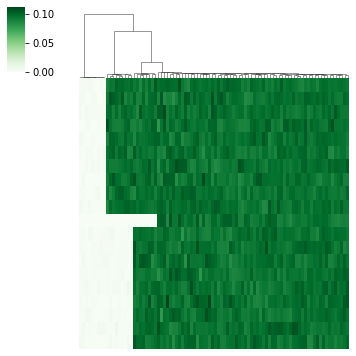

In [6]:
g1 = sns.clustermap(AF_linear.loc[informative_linear['Unnamed: 0']], row_cluster=False, xticklabels=False, yticklabels=False, cmap='Greens', figsize=(5,5))
idx1 = g1.dendrogram_col.reordered_ind

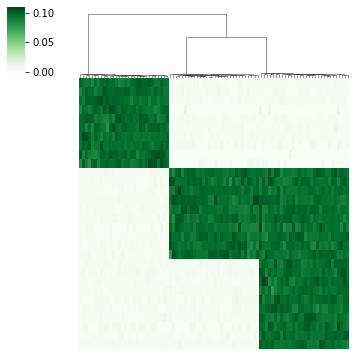

In [7]:
g2 = sns.clustermap(AF_mixed.loc[informative_mixed['Unnamed: 0']], row_cluster=False, xticklabels=False, yticklabels=False, cmap='Greens', figsize=(5,5))
idx2 = g2.dendrogram_col.reordered_ind

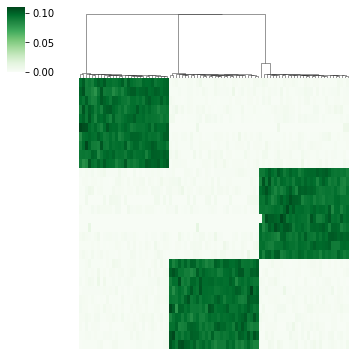

In [8]:
g3 = sns.clustermap(AF_branched.loc[informative_branched['Unnamed: 0']], row_cluster=False, xticklabels=False, yticklabels=False, cmap='Greens', figsize=(5,5))
idx3 = g3.dendrogram_col.reordered_ind

In [9]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
def colcolors(ax, label_num):
    divider = make_axes_locatable(ax)
    top_ax = divider.append_axes("top", size=0.13, pad=0.02, sharex=ax)
    LEFT = 0
    iicolor = 0
    c_names = ['A', 'B', 'C']
    clone_pal = ['royalblue', 'firebrick', 'green']
    for num in label_num:
            top_ax.barh(0,num,left=LEFT,color=clone_pal[iicolor])
            top_ax.text(x=LEFT + num/2, y=0.8, s=c_names[iicolor], va='center', ha='center')
            top_ax.set_xlim(0, 90)
            top_ax.axis('off')
            LEFT += num
            iicolor += 1

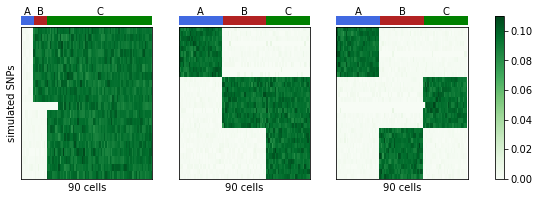

In [31]:
fig = plt.figure(figsize=(10,3))
nrows = 1
ncols = 3
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
axes = [ fig.add_subplot(nrows, ncols, r * ncols + c + 1) for r in range(0, nrows) for c in range(0, ncols) ]

axes[0].imshow(AF_linear.loc[informative_linear['Unnamed: 0']][idx1], aspect='auto', interpolation='none', cmap='Greens')
axes[0].set_ylabel('simulated SNPs')
colcolors(axes[0], [9,9,72])

axes[1].imshow(AF_mixed.loc[informative_mixed['Unnamed: 0']][idx2], aspect='auto', interpolation='none', cmap = 'Greens')
colcolors(axes[1], [30,30,30])

res = axes[2].imshow(AF_branched.loc[informative_branched['Unnamed: 0']][idx3], aspect='auto', interpolation='none', cmap='Greens')
colcolors(axes[2], [30,30,30])

cbar = fig.colorbar(res, ax=axes)

for ax in axes:
    ax.set_xlabel('90 cells')
    
plt.setp(axes, xticks=[], yticks=[])
#plt.tight_layout()
plt.savefig('figures/evolutionary_models_AF_heatmap.pdf')

loading data from ../kim/data/cellsnp/cellSNP.cells.vcf.gz...
Precision = 0.6180674671240709
Recall = 0.7180305305305305
Precision = 0.6180674671240709
Recall = 0.7180305305305305
Precision = 0.9382173382173381
Recall = 0.938501001001001
Precision = 0.9463937621832358
Recall = 0.94751001001001
Precision = 0.9309523809523809
Recall = 0.9315565565565566


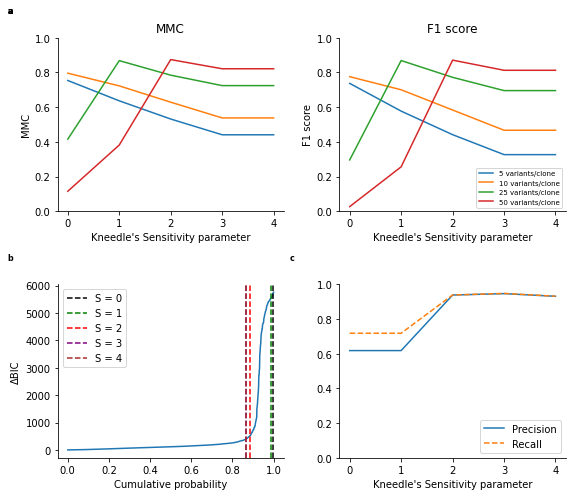

In [41]:
## compare Kneedle cutoffs and variant detection

from mquad.mquad_utils import findKnee, confusionMatrix
from utils import process_mquad_data, load_vcf_data
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score, recall_score
from vireoSNP import BinomMixtureVB

fig = plt.figure(figsize=(8,7))
cm = 1/2.54
n = [5,10,25,50]

for num in n:
    mmc = []
    f1 = []
    
    mquad = process_mquad_data(num,10)

    over0 = mquad.deltaBIC[mquad.deltaBIC > 10]
    y = np.sort(over0.astype(float))
    x = np.linspace(0, 1, len(over0)+1)[1:]

    for i in range(5):
        x, y, knee, knee_y = findKnee(mquad.deltaBIC, sens=i)
        mquad['classification'] = [True if d >= knee_y else False for d in mquad.deltaBIC]
        mmc.append(matthews_corrcoef(mquad.truth, mquad.classification))
        f1.append(f1_score(mquad.truth, mquad.classification))
    
    ax=plt.subplot(2,2,1)
    ax.text(-0.5*cm, 3*cm, 'a', transform = ax.transAxes, fontsize = 8, fontweight = 'bold', va='top', ha='right')
    plt.plot(range(5),mmc)
    plt.title("MMC")
    plt.ylabel("MMC")
    plt.ylim([0,1])
    plt.xlabel("Kneedle's Sensitivity parameter")

    plt.subplot(2,2,2)
    plt.plot(range(5),f1, label=str(num)+" variants/clone")
    plt.legend(loc="lower right", fontsize=7)
    plt.title("F1 score")
    plt.xlabel("Kneedle's Sensitivity parameter")
    plt.ylabel("F1 score")
    plt.ylim([0,1])


kim = pd.read_csv('../kim/data/mquad/BIC_params.csv')
over0 = kim.deltaBIC[kim.deltaBIC > 10]
y = np.sort(over0.astype(float))
x = np.linspace(0, 1, len(over0)+1)[1:]

ax = plt.subplot(2,2,3)
ax.text(-0.5*cm, 3*cm, 'b', transform = ax.transAxes, fontsize = 8, fontweight = 'bold', va='top', ha='right')
knee_list = []
knee_y_list = []

for i in range(5):
    x, y, knee, knee_y = findKnee(mquad.deltaBIC, sens=i)
    knee_list.append(knee)
    knee_y_list.append(knee_y)

plt.plot(x,y)
plt.ylabel("\u0394BIC")
plt.xlabel("Cumulative probability")

colors=['black','g','r','purple','brown']

for k in range(5):
    plt.axvline(x=knee_list[k], linestyle='--', c=colors[k], label="S = " + str(k))

plt.legend()

ax=plt.subplot(2,2,4)
ax.text(-0.5*cm, 3*cm, 'c', transform = ax.transAxes, fontsize = 8, fontweight = 'bold', va='top', ha='right')

AD, DP, AF = load_vcf_data("../kim/data/cellsnp/cellSNP.cells.vcf.gz")

## select variants then fit clones with selected AD and DP
p, r = [], []
for i in range(5):
    selected_var = kim.variant_name[(kim.deltaBIC >= knee_y_list[i]) & (kim.PASS_MINCELLS == True)]
    mquad_AD = scipy.sparse.csr_matrix(AD.loc[selected_var,:].values)
    mquad_DP = scipy.sparse.csr_matrix(DP.loc[selected_var,:].values)

    _model = BinomMixtureVB(n_var=len(selected_var), n_cell=121, n_donor=3)
    _model.fit(mquad_AD, mquad_DP, min_iter=30, n_init=300)

    clone_id = np.argmax(_model.ID_prob, axis=1)
    real_lab = ['PDX mRCC'] * 37 + ['PDX pRCC'] * 48 + ['Pt mRCC'] * 36
    conf_mat = confusionMatrix(clone_id, real_lab)
    precision = np.mean(conf_mat.max(axis=1)/conf_mat.sum(axis=1)) 
    recall = np.mean(conf_mat.max(axis=0)/conf_mat.sum(axis=0)) 
    p.append(precision)
    r.append(recall)

plt.plot(range(5), p, label="Precision")
plt.plot(range(5), r, label="Recall", linestyle="--")
plt.legend(loc='lower right')
plt.xlabel("Kneedle's Sensitivity parameter")
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('figures/supp_kneedle.pdf')

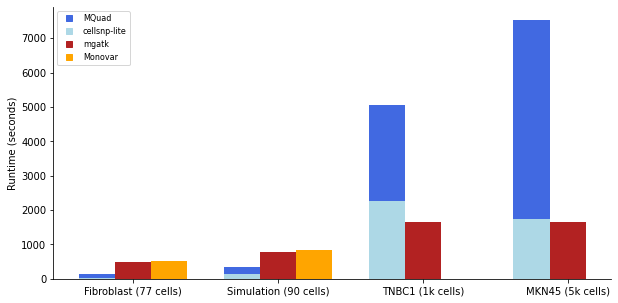

In [29]:
## plot runtime comparisons
fig = plt.figure(figsize=(10,5))

datasets = ['Fibroblast (77 cells)', 'Simulation (90 cells)', 'TNBC1 (1k cells)', 'MKN45 (5k cells)']

time_cellsnp = [35, 153, 2257, 1727]
time_mquad = [66, 37, 537, 4077]
time_mgatk = [487, 783, 1657, 1657]
time_monovar = [526, 833]
for i in range(len(datasets)):
    plt.bar(i, time_cellsnp[i] + time_mquad[i], bottom=time_cellsnp[i], color='royalblue', width=0.25)
    plt.bar(i, time_cellsnp[i], color='lightblue', width=0.25)
    plt.bar(i+0.25, time_mgatk[i], color='firebrick', width=0.25)
    if i < 2:
        plt.bar(i+0.5, time_monovar[i], color='orange', width=0.25)

plt.ylabel('Runtime (seconds)')
plt.xticks([i+0.25 for i in range(len(datasets))], datasets)
plt.legend([Line2D([0], [0], linewidth=0, marker='s', color="royalblue", label="MQuad"),
Line2D([0], [0], linewidth=0, marker='s', color="lightblue", label="cellsnp-lite"),
Line2D([0], [0], linewidth=0, marker='s', color="firebrick", label="mgatk"),
Line2D([0], [0], linewidth=0, marker='s', color="orange", label="Monovar")], 
['MQuad', 'cellsnp-lite', 'mgatk', 'Monovar'], loc='upper left', prop={'size': 8})

plt.savefig('figures/runtime_comparison.pdf')